# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

Дедлайн: **08.11.23 23:59**


### О задании



В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


**Оценивание и штрафы**

Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


**Формат сдачи**

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 9.5


Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)



В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    Q(w) = \dfrac{1}{\ell} \left( y^Ty - w*X^Ty - w*y^TX + w^2X^TX \right)
$$

$$
    Q'(w) = \dfrac{2}{\ell} \left(X^TXw - X^Ty\right)
$$

$$
    Q'(w) = \dfrac{2}{\ell} X^T\left(Xw - y\right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](https://github.com/esokolov/ml-course-hse/blob/master/2023-fall/homeworks-practice/homework-practice-03-gd/adam_meme.png?raw=1)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)




В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [ ]:
from __future__ import annotations

from typing import List

import numpy as np

from descents import BaseDescent
from descents import get_descent

In [ ]:
class LinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)

        self.tolerance: float = tolerance
        self.max_iter: int = max_iter

        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Fitting descent weights for x and y dataset
        :param x: features array
        :param y: targets array
        :return: self
        """
        self.loss_history.append(self.calc_loss(x, y))
        for i in range(self.max_iter):
          if np.isnan(self.descent.step(x, y)).any():
            break
          if np.sqrt(np.sum(self.descent.step(x, y)))**2 < self.tolerance:
            break
          self.descent.w += self.descent.step(x, y)
          self.loss_history.append(self.calc_loss(x, y))


    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicting targets for x dataset
        :param x: features array
        :return: prediction: np.ndarray
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculating loss for x and y dataset
        :param x: features array
        :param y: targets array
        """
        return self.descent.calc_loss(x, y)

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%autoreload 2

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

[1.62083519 0.80736614 1.59054448 0.92111237 1.0101939  0.7387306
 0.82794976 0.3926876  0.73913859 1.87280036 0.60831985 1.02205893
 1.06298081 1.2413251  0.57139134 0.70269084 1.28506056 0.6044078
 1.10267384 0.48875357]

0.6061550129178795



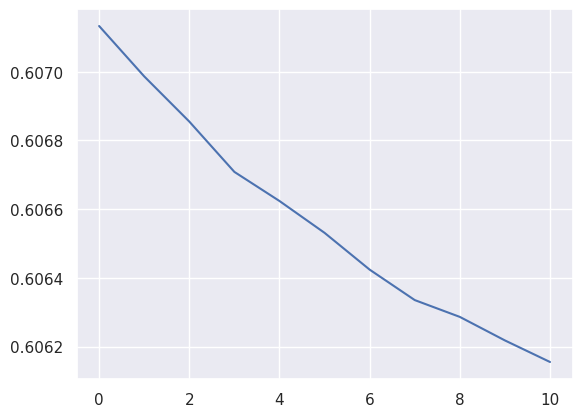

In [ ]:
import matplotlib.pyplot as plt

print(regression.predict(x)[:20], end = '\n\n')

print(regression.calc_loss(x,y), end = '\n\n')

plt.plot(regression.loss_history);

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/96060975/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/96061285/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/96061406/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/96082775/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/96062589/

## Задание 4. Работа с данными (1 балл)



Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.


* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [ ]:
np.random.seed(42)


In [ ]:
data = pd.read_csv('autos.csv')

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

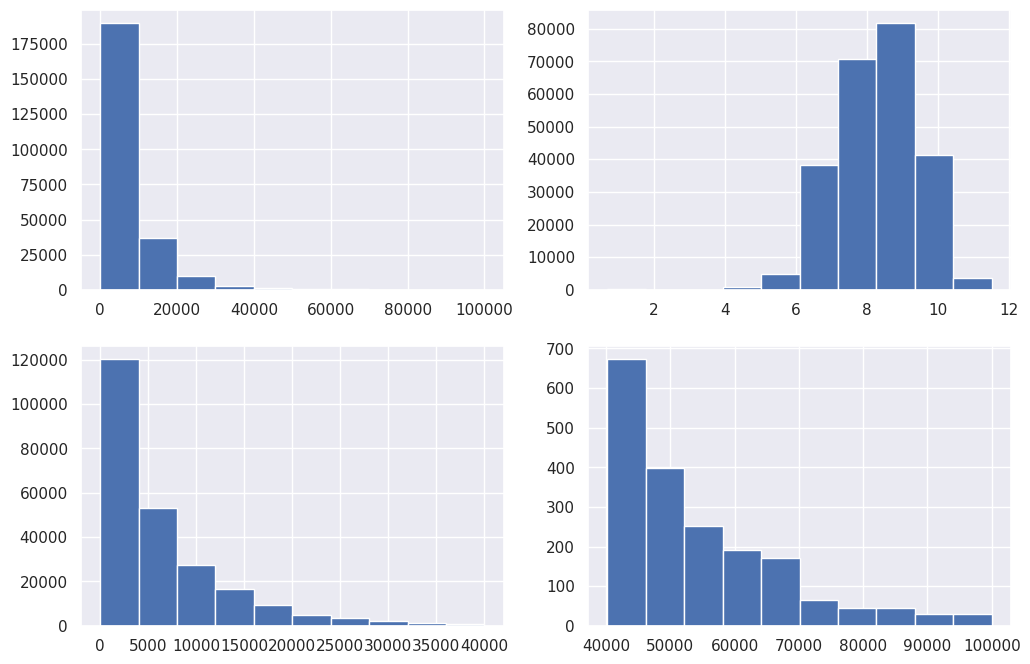

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[1, 0].hist(data['price'][data['price'] < 40000])
axs[0, 1].hist(np.log1p(data['price']))
axs[1, 1].hist(data['price'][data['price'] > 40000])
axs[0, 0].hist(data['price']);

In [ ]:
# Машин с ценой больше 40к всего 1901 из 240 000+.
# Однако такими темпами можно выкинуть сразу всю выборку,
# поэтому для начала я поработаю с логарифмом

In [ ]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

In [ ]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

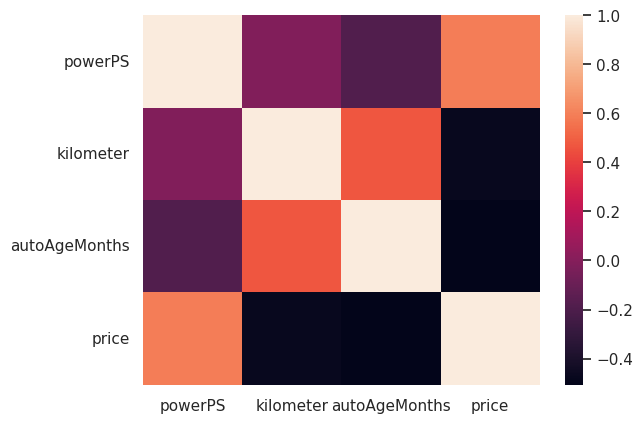

In [ ]:
sns.heatmap(data[numeric + ['price']].corr());
# мощность двигателя в пферде штарке довольно неплохо положительно коррелирует с ценой
# в то же время остальные признаки - пробег и возраст авто - коррелируют отрицательно с ценой
# и сильно между собой. Один из них можно будет выкинуть

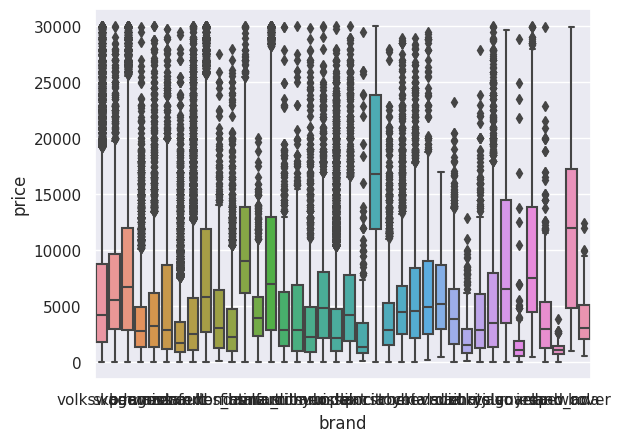

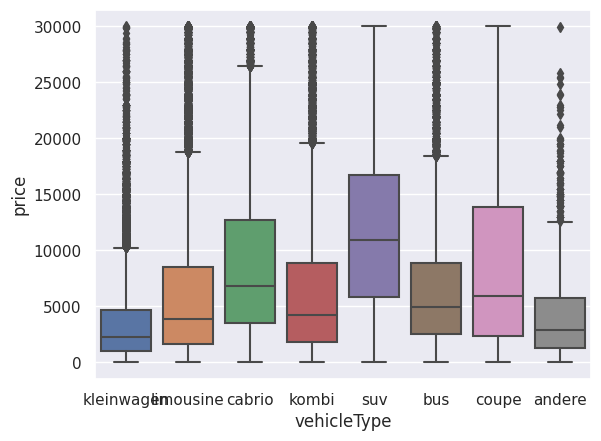

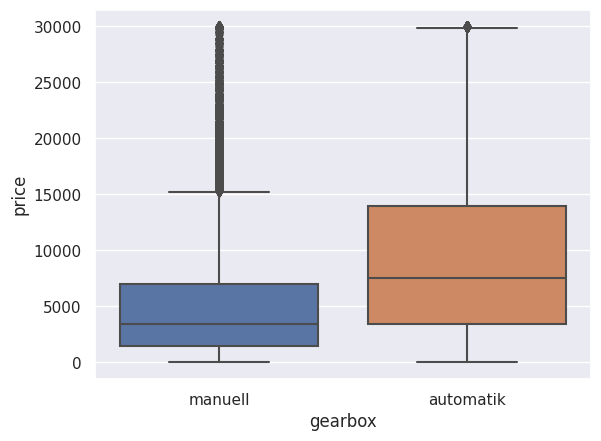

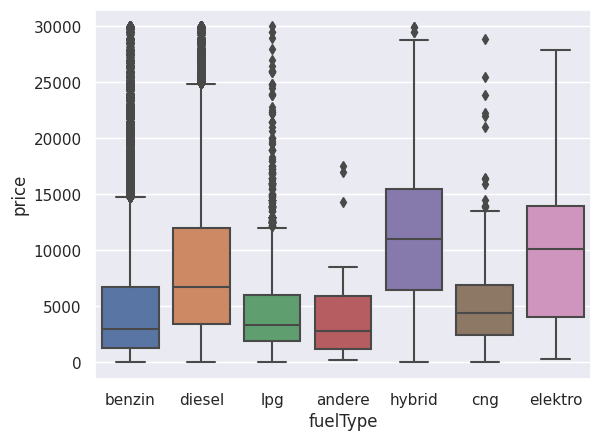

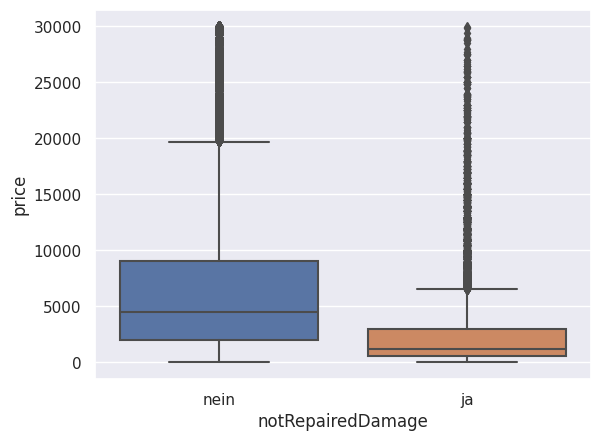

In [ ]:
for col in categorical:
  # sns.boxplot(x = X_train['Traffic'], y = y_train)
  sns.boxplot(x = data[col], y = data['price'][data['price'] < 30_000])
  plt.show()

In [ ]:
data['bias'] = 1
other = ['bias']

x = data[categorical + numeric + other]
y_true = data['price']
y = np.log1p(y_true)

In [ ]:
from sklearn.preprocessing import StandardScaler

x = pd.get_dummies(x)

In [ ]:
from sklearn.model_selection import train_test_split

X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_t = scaler.fit_transform(X_t)
X_test = scaler.transform(X_test)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.25, random_state=42)

In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)
type(y_train)

(144714,) (48238,) (48238,)


pandas.core.series.Series

In [ ]:
y_train, y_val, y_test = np.array([y_train])[0], np.array([y_val])[0], np.array([y_test])[0]

In [ ]:
X_train, y_train = X_train[:10000], y_train[:10000]

In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(10000,) (48238,) (48238,)


In [ ]:
# X_train = X_train[:, :5]
# X_val = X_val[:, :5]

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

In [ ]:
((y_val - y_val.mean())**2).mean()**(0.5) # бейзлайн

1.1534913056848484

In [ ]:
# Я делал регрессию без константы, поэтому значения ошибок везде будут гигантскими -
# не нужно пугаться

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
dimension = X_train.shape[1]
max_iter = 300
# tolerance = 0.001

In [ ]:
from sklearn.metrics import r2_score

train: 80.4458, val: 81.0622, n_iter: 301, R^2: -7.144331789559342
train: 80.4377, val: 81.4246, n_iter: 301, R^2: -7.254756162017999
train: 71.1134, val: 71.7538, n_iter: 301, R^2: -20.025430802509135
train: 68.574, val: 69.2171, n_iter: 301, R^2: -49.19601096071981
train: 68.467, val: 69.0243, n_iter: 301, R^2: -55.195255417065084


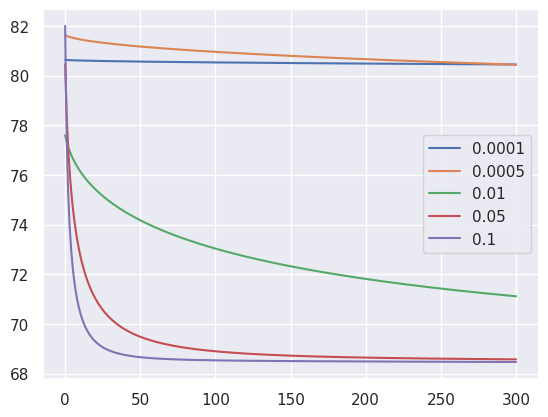

In [ ]:
name = 'full'
for lr in [0.0001, 0.0005, 0.01, 0.05, 0.1]:
        descent_config = {
            'descent_name': name,
            'kwargs': {'dimension': dimension, 'lambda_': lr}
        }

        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )

        regression.fit(X_train, y_train)
        plt.plot(regression.loss_history)
        plt.legend([0.0001, 0.0005, 0.01, 0.05, 0.1])
        plt.show
        print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')

In [ ]:
# Лучшее качество на вале -
# 69.0243 при lr = 0.1

train: 80.4004, val: 80.6643, n_iter: 301, R^2: -6.914451712374838
train: 83.2071, val: 83.797, n_iter: 301, R^2: -5.875365125678227
train: 84.1456, val: 83.9109, n_iter: 301, R^2: -5.709789069477034
train: 77.6609, val: 78.2243, n_iter: 301, R^2: -8.127482549115783
train: 81.861, val: 82.2599, n_iter: 301, R^2: -6.526162471431944
train: 74.9454, val: 75.2918, n_iter: 301, R^2: -13.647529376139
train: 71.559, val: 72.0771, n_iter: 301, R^2: -18.20419574683188


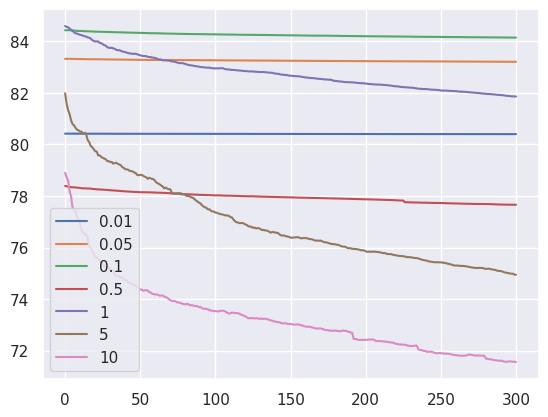

In [ ]:
name = 'stochastic'
for lr in [0.01, 0.05, 0.1, 0.5, 1, 5, 10]:
        descent_config = {
            'descent_name': name,
            'kwargs': {'dimension': dimension, 'batch_size': 10, 'lambda_': lr}
        }

        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )

        regression.fit(X_train, y_train)
        plt.plot(regression.loss_history)
        plt.legend([0.01, 0.05, 0.1, 0.5, 1, 5, 10])
        plt.show
        print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')
        # print(round(regression.calc_loss(X_train, y_train), 4), round(regression.calc_loss(X_val, y_val), 4), len(regression.loss_history))

In [ ]:
# Лучшее качество на валидационной выборке -
# 72.0771 при lr = 10
# хуже полной регрессии, что неудивительно - мы жертвуем качеством ради скорости

train: 78.2313, val: 78.6839, n_iter: 301, R^2: -10.008057324926579
train: 78.5497, val: 79.4027, n_iter: 301, R^2: -7.801040928575377
train: 81.3193, val: 82.3159, n_iter: 301, R^2: -5.6484251205691045
train: 80.3889, val: 80.7808, n_iter: 301, R^2: -7.009609748743564
train: 78.0251, val: 79.2975, n_iter: 301, R^2: -7.093557353829768
train: 79.442, val: 79.1753, n_iter: 301, R^2: -7.150154856000238
train: 73.6838, val: 74.8195, n_iter: 301, R^2: -12.293460355191813
train: 68.379, val: 69.095, n_iter: 301, R^2: -52.469981461631974
train: 68.0618, val: 73.8542, n_iter: 301, R^2: -11.275113801596456
train: 67.4796, val: 101.253, n_iter: 301, R^2: -2.035996098228034


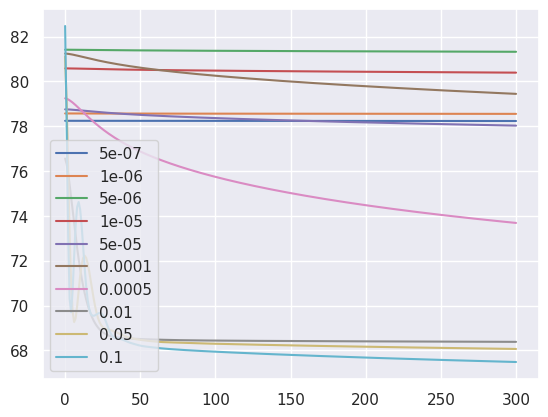

In [ ]:
name = 'momentum'
for lr in [0.0000005, 0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.01, 0.05, 0.1]:
        descent_config = {
            'descent_name': name,
            'kwargs': {'dimension': dimension, 'lambda_': lr}
        }

        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )

        regression.fit(X_train, y_train)
        plt.plot(regression.loss_history)
        plt.legend([0.0000005, 0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.01, 0.05, 0.1])
        plt.show
        print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')
        # print(round(regression.calc_loss(X_train, y_train), 4), round(regression.calc_loss(X_val, y_val), 4), len(regression.loss_history))

In [ ]:
# 69.095 при 0.01

train: 81.8912, val: 82.1884, n_iter: 301, R^2: -5.779724621909603
train: 76.6337, val: 77.2989, n_iter: 301, R^2: -8.9410095521299
train: 83.5887, val: 83.6161, n_iter: 301, R^2: -5.727087796652755
train: 80.3222, val: 80.2508, n_iter: 301, R^2: -5.972367690544148
train: 78.0627, val: 78.5069, n_iter: 301, R^2: -8.28833695482235
train: 73.6094, val: 74.018, n_iter: 301, R^2: -16.246904884785373
train: 70.918, val: 71.6195, n_iter: 301, R^2: -24.958728192694643
train: 68.2993, val: 69.6151, n_iter: 301, R^2: -37.59959422239368
train: 67.955, val: 77.065, n_iter: 301, R^2: -7.362506191458952
train: 65.6946, val: 338.8466, n_iter: 301, R^2: -0.2515354708520512


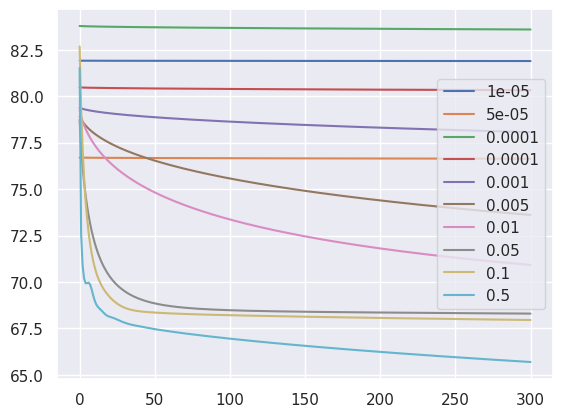

In [ ]:
name = 'adam'
for lr in [0.00001, 0.00005, 0.0001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
        descent_config = {
            'descent_name': name,
            'kwargs': {'dimension': dimension, 'lambda_': lr}
        }

        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )

        regression.fit(X_train, y_train)
        plt.plot(regression.loss_history)
        plt.legend([0.00001, 0.00005, 0.0001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5])
        plt.show
        print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')
        # print(round(regression.calc_loss(X_train, y_train), 4), round(regression.calc_loss(X_val, y_val), 4), len(regression.loss_history))

In [ ]:
# 69.6151 при 0.05

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

train: 68.4109, val: 69.0055, n_iter: 301, R^2: -56.41366988810186
train: 72.1585, val: 72.8469, n_iter: 301, R^2: -15.830591687365224
train: 68.3713, val: 69.1517, n_iter: 301, R^2: -50.32099012102974
train: 68.222, val: 70.5846, n_iter: 301, R^2: -24.683476676413555


<function matplotlib.pyplot.show(close=None, block=None)>

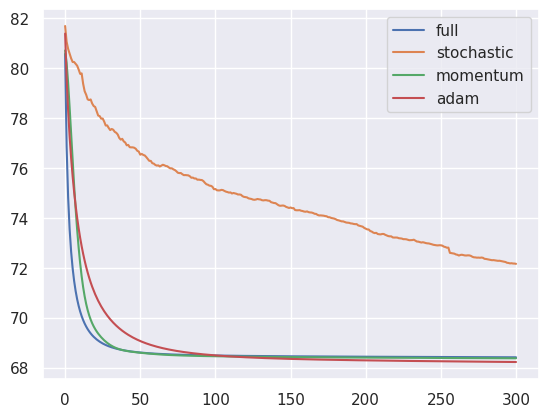

In [ ]:
name = 'full'
lr = 0.1
descent_config = {
    'descent_name': name,
    'kwargs': {'dimension': dimension, 'lambda_': lr}
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(X_train, y_train)
plt.plot(regression.loss_history)
print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')



name = 'stochastic'
lr = 10
descent_config = {
    'descent_name': name,
    'kwargs': {'dimension': dimension, 'batch_size': 10, 'lambda_': lr}
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(X_train, y_train)
plt.plot(regression.loss_history)
print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')



name = 'momentum'
lr = 0.01
descent_config = {
    'descent_name': name,
    'kwargs': {'dimension': dimension, 'lambda_': lr}
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(X_train, y_train)
plt.plot(regression.loss_history)
print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')



name = 'adam'
lr = 0.05
descent_config = {
    'descent_name': name,
    'kwargs': {'dimension': dimension, 'lambda_': lr}
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(X_train, y_train)
plt.plot(regression.loss_history)
print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')

plt.legend(['full', 'stochastic', 'momentum', 'adam'])
plt.show



## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)



В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

train: 80.7524, val: 81.2228, n_iter: 301, R^2: -5.8187784899096595
train: 80.0624, val: 80.6235, n_iter: 301, R^2: -7.597518006627764
train: 83.439, val: 83.8596, n_iter: 301, R^2: -5.534270382645011
train: 82.4212, val: 83.2283, n_iter: 301, R^2: -6.802641240703273
train: 79.202, val: 80.2733, n_iter: 301, R^2: -6.3649783074330415
train: 80.0035, val: 80.4962, n_iter: 301, R^2: -8.033038251251286
train: 79.5546, val: 80.2577, n_iter: 301, R^2: -5.733586543581558
train: 81.1332, val: 82.2522, n_iter: 301, R^2: -5.912322472490536
train: 85.1721, val: 85.3546, n_iter: 301, R^2: -5.1663786983396776
train: 78.8571, val: 79.6636, n_iter: 301, R^2: -6.467561413288309
train: 80.2383, val: 80.7982, n_iter: 301, R^2: -7.39999724373312
train: 78.2659, val: 78.5352, n_iter: 301, R^2: -8.39191049859915
train: 78.9635, val: 79.6834, n_iter: 301, R^2: -6.616307622633573
train: 76.9379, val: 77.6096, n_iter: 301, R^2: -7.761753275555231
train: 78.373, val: 78.8063, n_iter: 301, R^2: -9.5130237070584

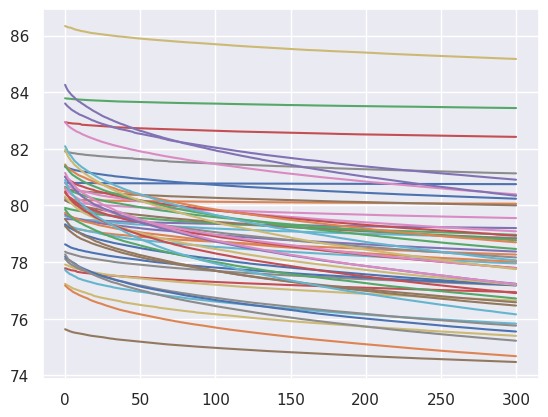

In [ ]:
batch_sizes = np.arange(5, 500, 10)

name = 'stochastic'
for batch_size in batch_sizes:
        descent_config = {
            'descent_name': name,
            'kwargs': {'dimension': dimension, 'batch_size': batch_size, 'lambda_': lr}
        }

        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )

        regression.fit(X_train, y_train)
        plt.plot(regression.loss_history)
        print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')


In [ ]:
# вообще говоря с ростом размера батча лосс падает, но это не во всех случаях верно
# на наших данных это видно не очень хорошо, здесь как будто нет разницы

In [ ]:
regression.predict(X_val)[:100].shape

(100,)

In [ ]:
X_val[:, 0][:100].shape

(100,)

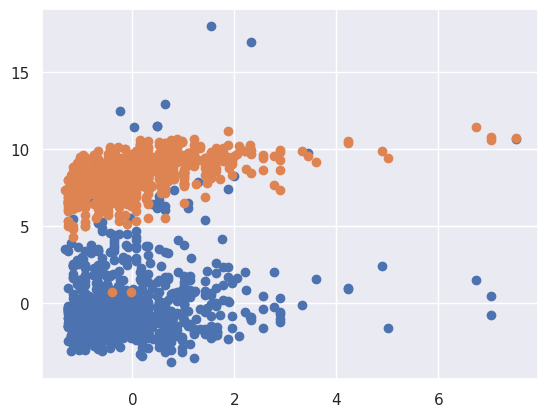

In [ ]:
plt.scatter(X_val[:, 0][:1000], regression.predict(X_val)[:1000])
plt.scatter(X_val[:, 0][:1000], y_val[:1000])

## Задание 7. Регуляризация (1 балл)



В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96453540/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
name = 'full'
for lr in [0.0001, 0.0005, 0.01, 0.05, 0.1]:
        descent_config = {
            'descent_name': name,
            'kwargs': {'dimension': dimension, 'lambda_': lr, 'regularized' : True}
        }

        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )

        regression.fit(X_train, y_train)
        plt.plot(regression.loss_history)
        plt.legend([0.0001, 0.0005, 0.01, 0.05, 0.1])
        plt.show
        print(f'train: {round(regression.calc_loss(X_train, y_train), 4)}, val: {round(regression.calc_loss(X_val, y_val), 4)}, n_iter: {len(regression.loss_history)}, R^2: {r2_score(regression.predict(X_val), y_val)}')

TypeError: ignored

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

## Бонусы

**Кулинарно-социализационный бонус (0.5 балла)**

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

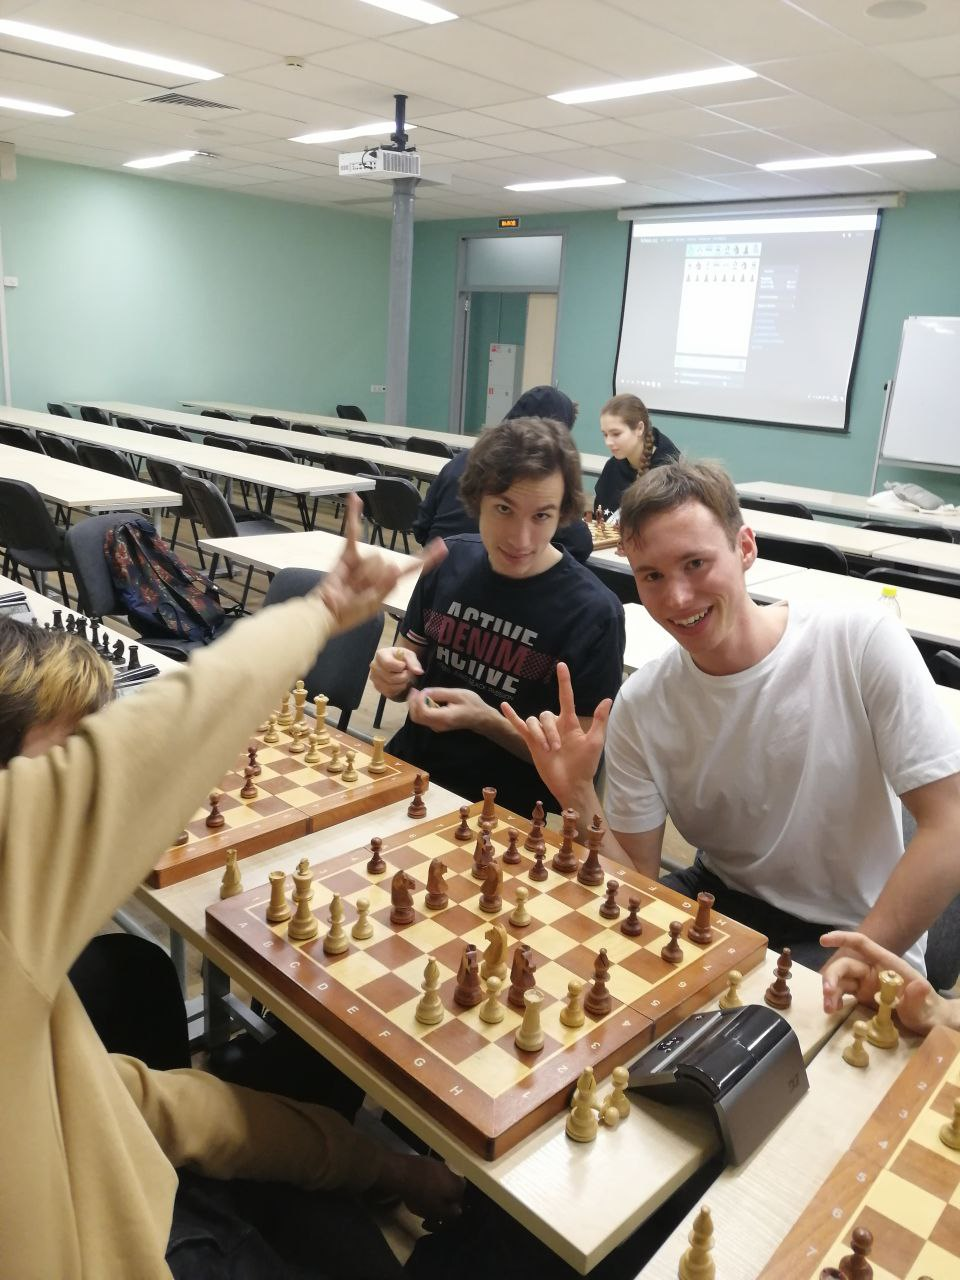

In [ ]:
# лучшее блюдо - конь противника :)

**Бонус 1. Другие методы градиентного спуска (1 балл)**

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

**Бонус 2. Другие функции потерь (1 балл)**

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: